In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('/content/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### Data Preprocessing and Visualization

In [5]:
df.shape

(142193, 24)

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [7]:
df=df.drop('RISK_MM',axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [9]:
numerical_attributes=[f for f in df.columns if df[f].dtypes!='O']
categorical_attributes=[f for f in df.columns if df[f].dtypes=='O']
discrete_val_attributes=[f for f in numerical_attributes if df[f].nunique()<25]
continuous_val_attributes=[f for f in numerical_attributes if f not in discrete_val_attributes]
print('numerical_attributes:',numerical_attributes)
print('categorical_attributes:',categorical_attributes)
print('discrete_val_attributes:',discrete_val_attributes)
print('continuous_val_attributes:',continuous_val_attributes)

numerical_attributes: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
categorical_attributes: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
discrete_val_attributes: ['Cloud9am', 'Cloud3pm']
continuous_val_attributes: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [10]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [11]:
df[continuous_val_attributes].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


#### Dealing with missing values

In [12]:
#The 75th percentile (Q3) and maximum values are relatively close for MinTemp,MaxTemp,Sunshine,Humidity9a
#Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
#this suggests that the data may not have an extremely skewed distribution.
import matplotlib.pyplot as plt
import seaborn as sns
thresh=22
small_dff=[]
for f in continuous_val_attributes:
  diff=df[f].max()-df[f].quantile(0.75)
  if diff<=thresh:
    small_dff.append(f)
print(small_dff)

['MinTemp', 'MaxTemp', 'Sunshine', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


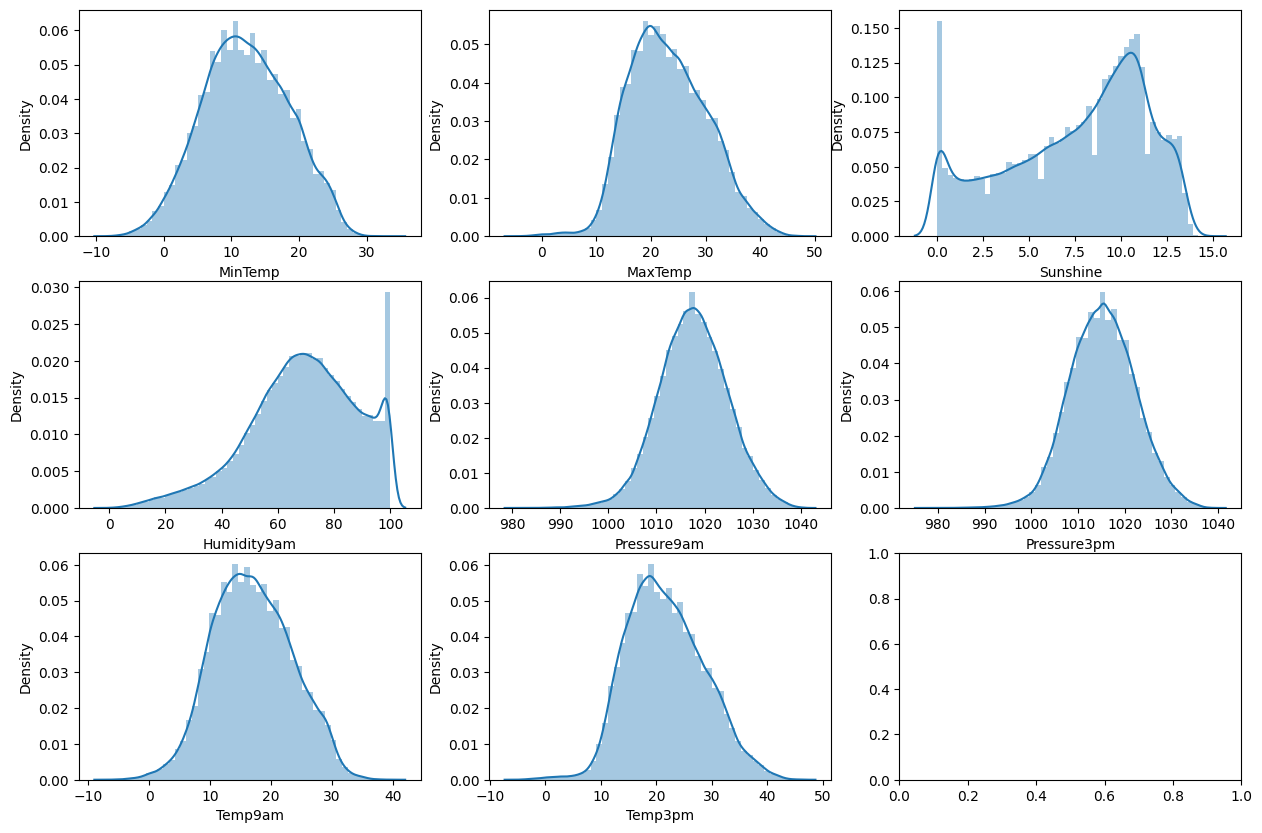

In [13]:
fig,axes=plt.subplots(3,3,figsize=(15,10))
for i in range(len(small_dff)):
  att=small_dff[i]
  sns.distplot(df[att],ax=axes[i//3,i%3])

In [14]:
#MinTemp, MaxTemp,Temp9am and Temp3pm seem to have a normal distribution and thus we'll impute the null values with the mean
#the others will be imputed using median
norm=['MinTemp','MaxTemp','Temp9am','Temp3pm']
for i in norm:
  df[i]=df[i].fillna(df[i].mean())

In [15]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
dtype: int64

In [16]:
rest=[]
for i in continuous_val_attributes:
  if i not in norm:
    rest.append(i)
print(rest)

['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']


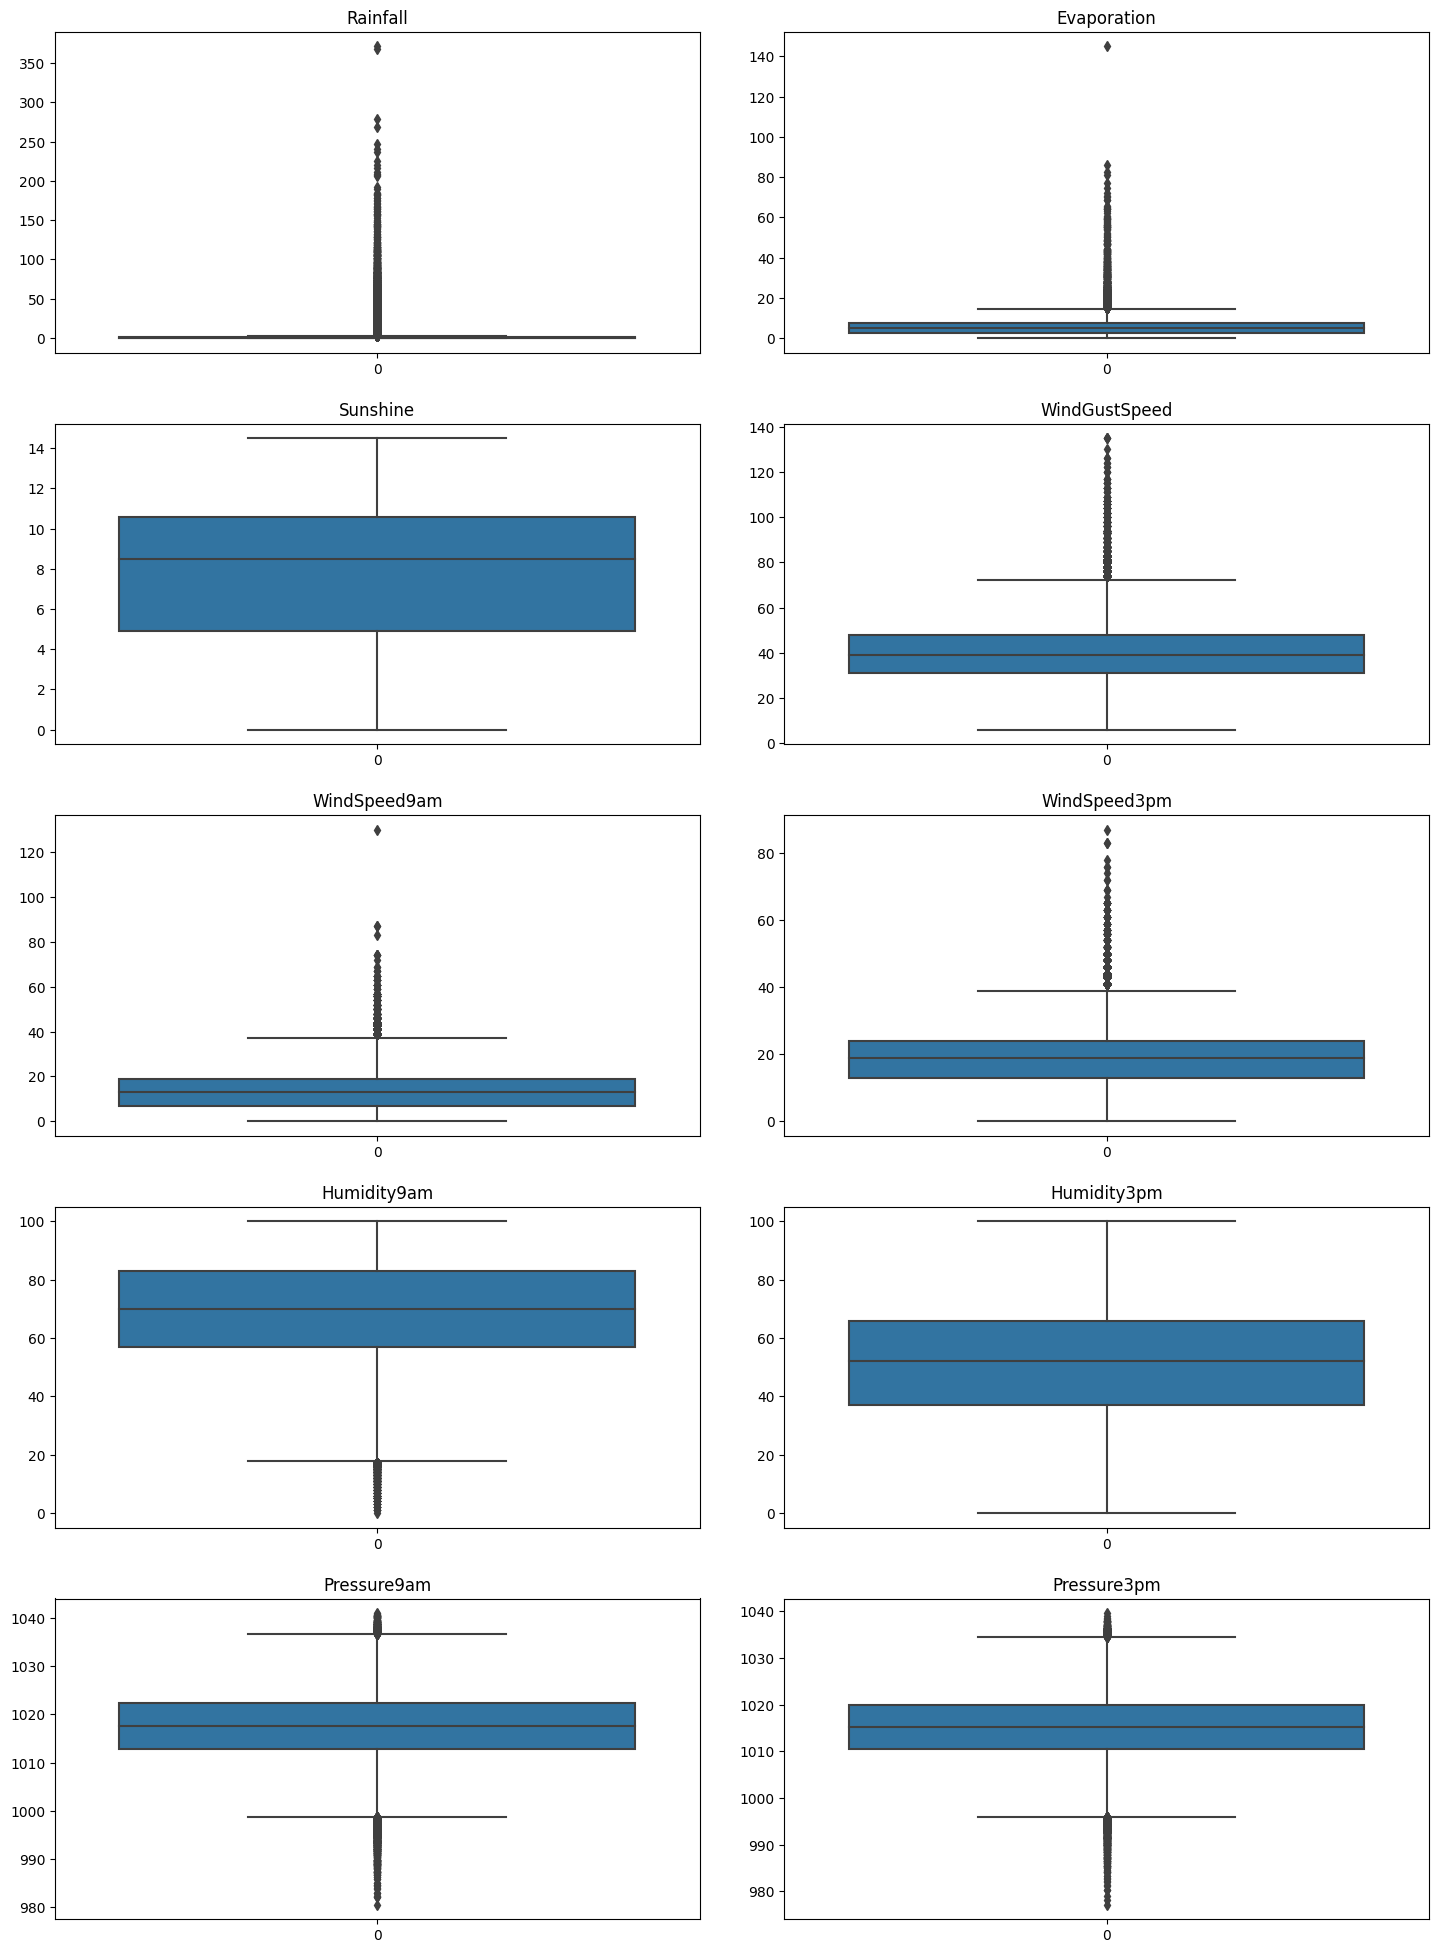

In [17]:
fig,axes=plt.subplots(5,2,figsize=(15,20))
fig.tight_layout(pad=3.0) #padding for better spacing
for i in range(len(rest)):
    att=rest[i]
    sns.boxplot(df[att],ax=axes[i//2,i%2])
    axes[i//2,i%2].set_title(att)
plt.show()

In [18]:
for i in rest:
  df[i]=df[i].fillna(df[i].median())

In [19]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am         53657
Cloud3pm         57094
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
dtype: int64

In [20]:
discrete_val_attributes

['Cloud9am', 'Cloud3pm']

In [21]:
for f in discrete_val_attributes:
  df[f]=df[f].fillna(df[f].mode()[0])

In [22]:
df[discrete_val_attributes].isnull().sum()

Cloud9am    0
Cloud3pm    0
dtype: int64

In [23]:
for i in ['WindGustDir','WindDir9am','WindDir3pm','RainToday']:
  df[i].fillna(df[i].mode()[0],inplace=True)

In [24]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [26]:
df['RainTomorrow'].unique(),df['RainToday'].unique()

(array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object))

In [27]:
for i in ['RainTomorrow','RainToday']:
  df[i]=le.fit_transform(df[i])

In [28]:
df[['RainToday','RainTomorrow']].head()

,RainToday,RainTomorrow
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


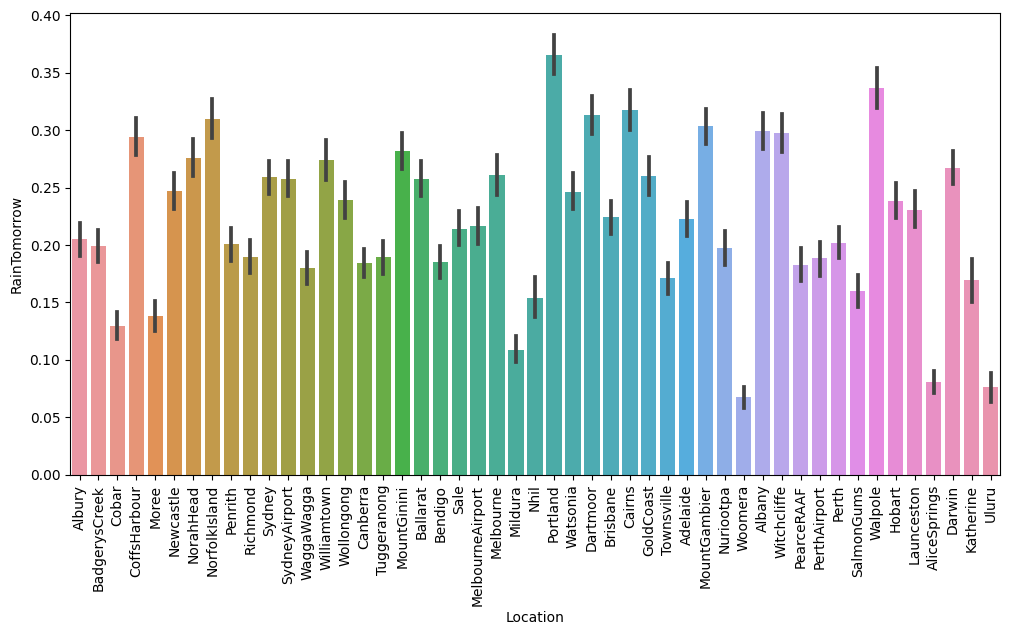

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(x='Location',y='RainTomorrow',data=df)
plt.xticks(rotation=90)
plt.show()

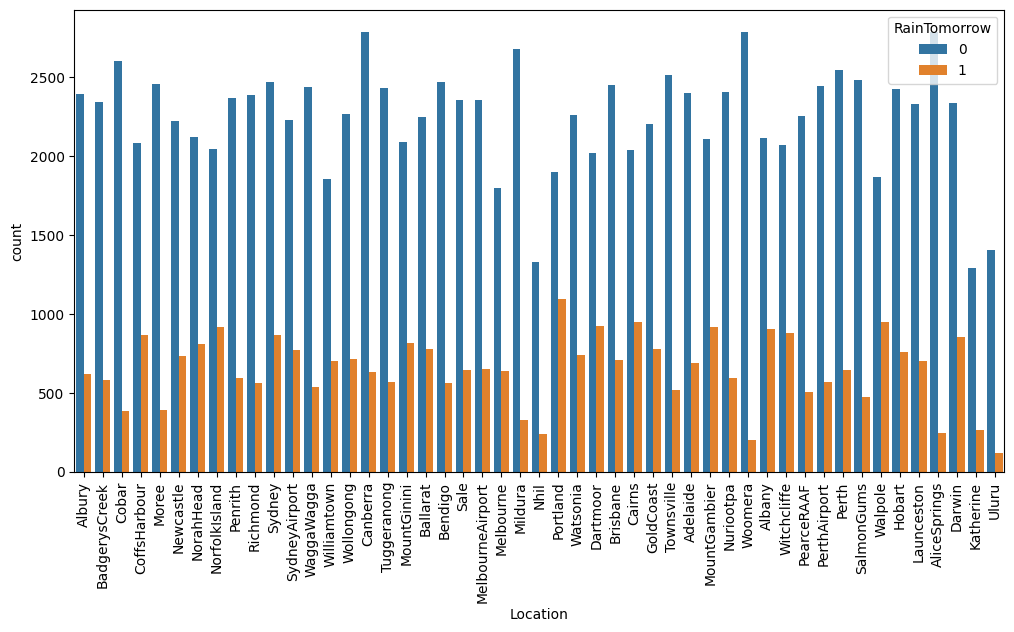

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', hue='RainTomorrow', data=df)
plt.xticks(rotation=90)
plt.show()

In [31]:
# we've to encode the other categorical attributes too
for f in categorical_attributes:
    print(f, (df.groupby([f])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2007-11-01', '2007-12-27', '2007-12-01', '2008-04-13', '2007-12-03',
       '2008-03-25', '2008-03-07', '2007-12-07', '2008-02-28', '2008-02-12',
       ...
       '2007-12-26', '2011-10-11', '2008-04-30', '2007-12-25', '2008-05-01',
       '2008-05-02', '2008-05-03', '2008-05-04', '2008-05-05', '2008-05-24'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Williamtown', 'Darwin', 'Melbourne', 'GoldCoast',
       'Sydney', 'Ballarat', 'SydneyAirport', 'Newcastle', 'Watsonia',
       'Wollongong', 'Hobart', 'Launceston', 'Brisbane', 'Adelaide',
       'MelbourneAirport', 'Sale', 'Albury', 'Perth', 'Penrith',
       'BadgerysCreek', 'Nuriootpa', 'Richmond', 'Tuggeranong', 'PerthAirport',
       'Bendigo', 'Canberra', 'PearceRAAF', 'WaggaWagga', 'Townsville',
       'Katherine', 'SalmonGums', 'Nhil', 

In [32]:
#the previous step was done to ensure that the weight assignment makes sense
def encode_cat(col):
  l=df.groupby([col])['RainTomorrow'].mean().sort_values(ascending=False).index
  map={}
  for i in range(len(l)):
    map[l[i]]=i
  return map

In [33]:
windgustdir = encode_cat('WindGustDir')
winddir9am = encode_cat('WindDir9am')
winddir3pm = encode_cat('WindDir3pm')

In [34]:
print(windgustdir)
print(winddir9am)
print(winddir3pm)

{'NW': 0, 'NNW': 1, 'WNW': 2, 'N': 3, 'W': 4, 'WSW': 5, 'NNE': 6, 'S': 7, 'SSW': 8, 'SW': 9, 'SSE': 10, 'NE': 11, 'SE': 12, 'ESE': 13, 'ENE': 14, 'E': 15}
{'NNW': 0, 'NW': 1, 'WNW': 2, 'NNE': 3, 'W': 4, 'N': 5, 'WSW': 6, 'SW': 7, 'SSW': 8, 'NE': 9, 'S': 10, 'SSE': 11, 'ENE': 12, 'SE': 13, 'ESE': 14, 'E': 15}
{'NNW': 0, 'NW': 1, 'N': 2, 'WNW': 3, 'W': 4, 'NNE': 5, 'WSW': 6, 'SSW': 7, 'S': 8, 'SE': 9, 'SW': 10, 'SSE': 11, 'NE': 12, 'ENE': 13, 'E': 14, 'ESE': 15}


In [35]:
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [36]:
df[['WindGustDir','WindDir9am','WindDir3pm']].head()

,WindGustDir,WindDir9am,WindDir3pm
0,4,4,3
1,2,0,6
2,5,4,6
3,11,13,14
4,4,12,1


In [37]:
df[categorical_attributes].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,4,4,3,0,0
1,2008-12-02,Albury,2,0,6,0,0
2,2008-12-03,Albury,5,4,6,0,0
3,2008-12-04,Albury,11,13,14,0,0
4,2008-12-05,Albury,4,12,1,0,0


In [38]:
#have to encode location and date
df_new=df.groupby(['Location'])['RainTomorrow'].value_counts().sort_values(ascending=False).unstack()
df_new

RainTomorrow,0,1
Location,,
Adelaide,2402,688
Albany,2114,902
Albury,2393,618
AliceSprings,2787,244
BadgerysCreek,2345,583
Ballarat,2247,781
Bendigo,2472,562
Brisbane,2452,709
Cairns,2038,950


In [39]:
location=df_new[1].sort_values(ascending=False).index
loc={}
for i in range(len(location)):
  loc[location[i]]=i
print(loc)

{'Portland': 0, 'Cairns': 1, 'Walpole': 2, 'Dartmoor': 3, 'MountGambier': 4, 'NorfolkIsland': 5, 'Albany': 6, 'Witchcliffe': 7, 'CoffsHarbour': 8, 'Sydney': 9, 'Darwin': 10, 'MountGinini': 11, 'NorahHead': 12, 'Ballarat': 13, 'GoldCoast': 14, 'SydneyAirport': 15, 'Hobart': 16, 'Watsonia': 17, 'Newcastle': 18, 'Wollongong': 19, 'Brisbane': 20, 'Williamtown': 21, 'Launceston': 22, 'Adelaide': 23, 'MelbourneAirport': 24, 'Perth': 25, 'Sale': 26, 'Melbourne': 27, 'Canberra': 28, 'Albury': 29, 'Penrith': 30, 'Nuriootpa': 31, 'BadgerysCreek': 32, 'Tuggeranong': 33, 'PerthAirport': 34, 'Bendigo': 35, 'Richmond': 36, 'WaggaWagga': 37, 'Townsville': 38, 'PearceRAAF': 39, 'SalmonGums': 40, 'Moree': 41, 'Cobar': 42, 'Mildura': 43, 'Katherine': 44, 'AliceSprings': 45, 'Nhil': 46, 'Woomera': 47, 'Uluru': 48}


In [40]:
df['Location']=df['Location'].map(loc)

In [41]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [42]:
df[categorical_attributes].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,29,4,4,3,0,0
1,2008-12-02,29,2,0,6,0,0
2,2008-12-03,29,5,4,6,0,0
3,2008-12-04,29,11,13,14,0,0
4,2008-12-05,29,4,12,1,0,0


#### Oulier Treatment

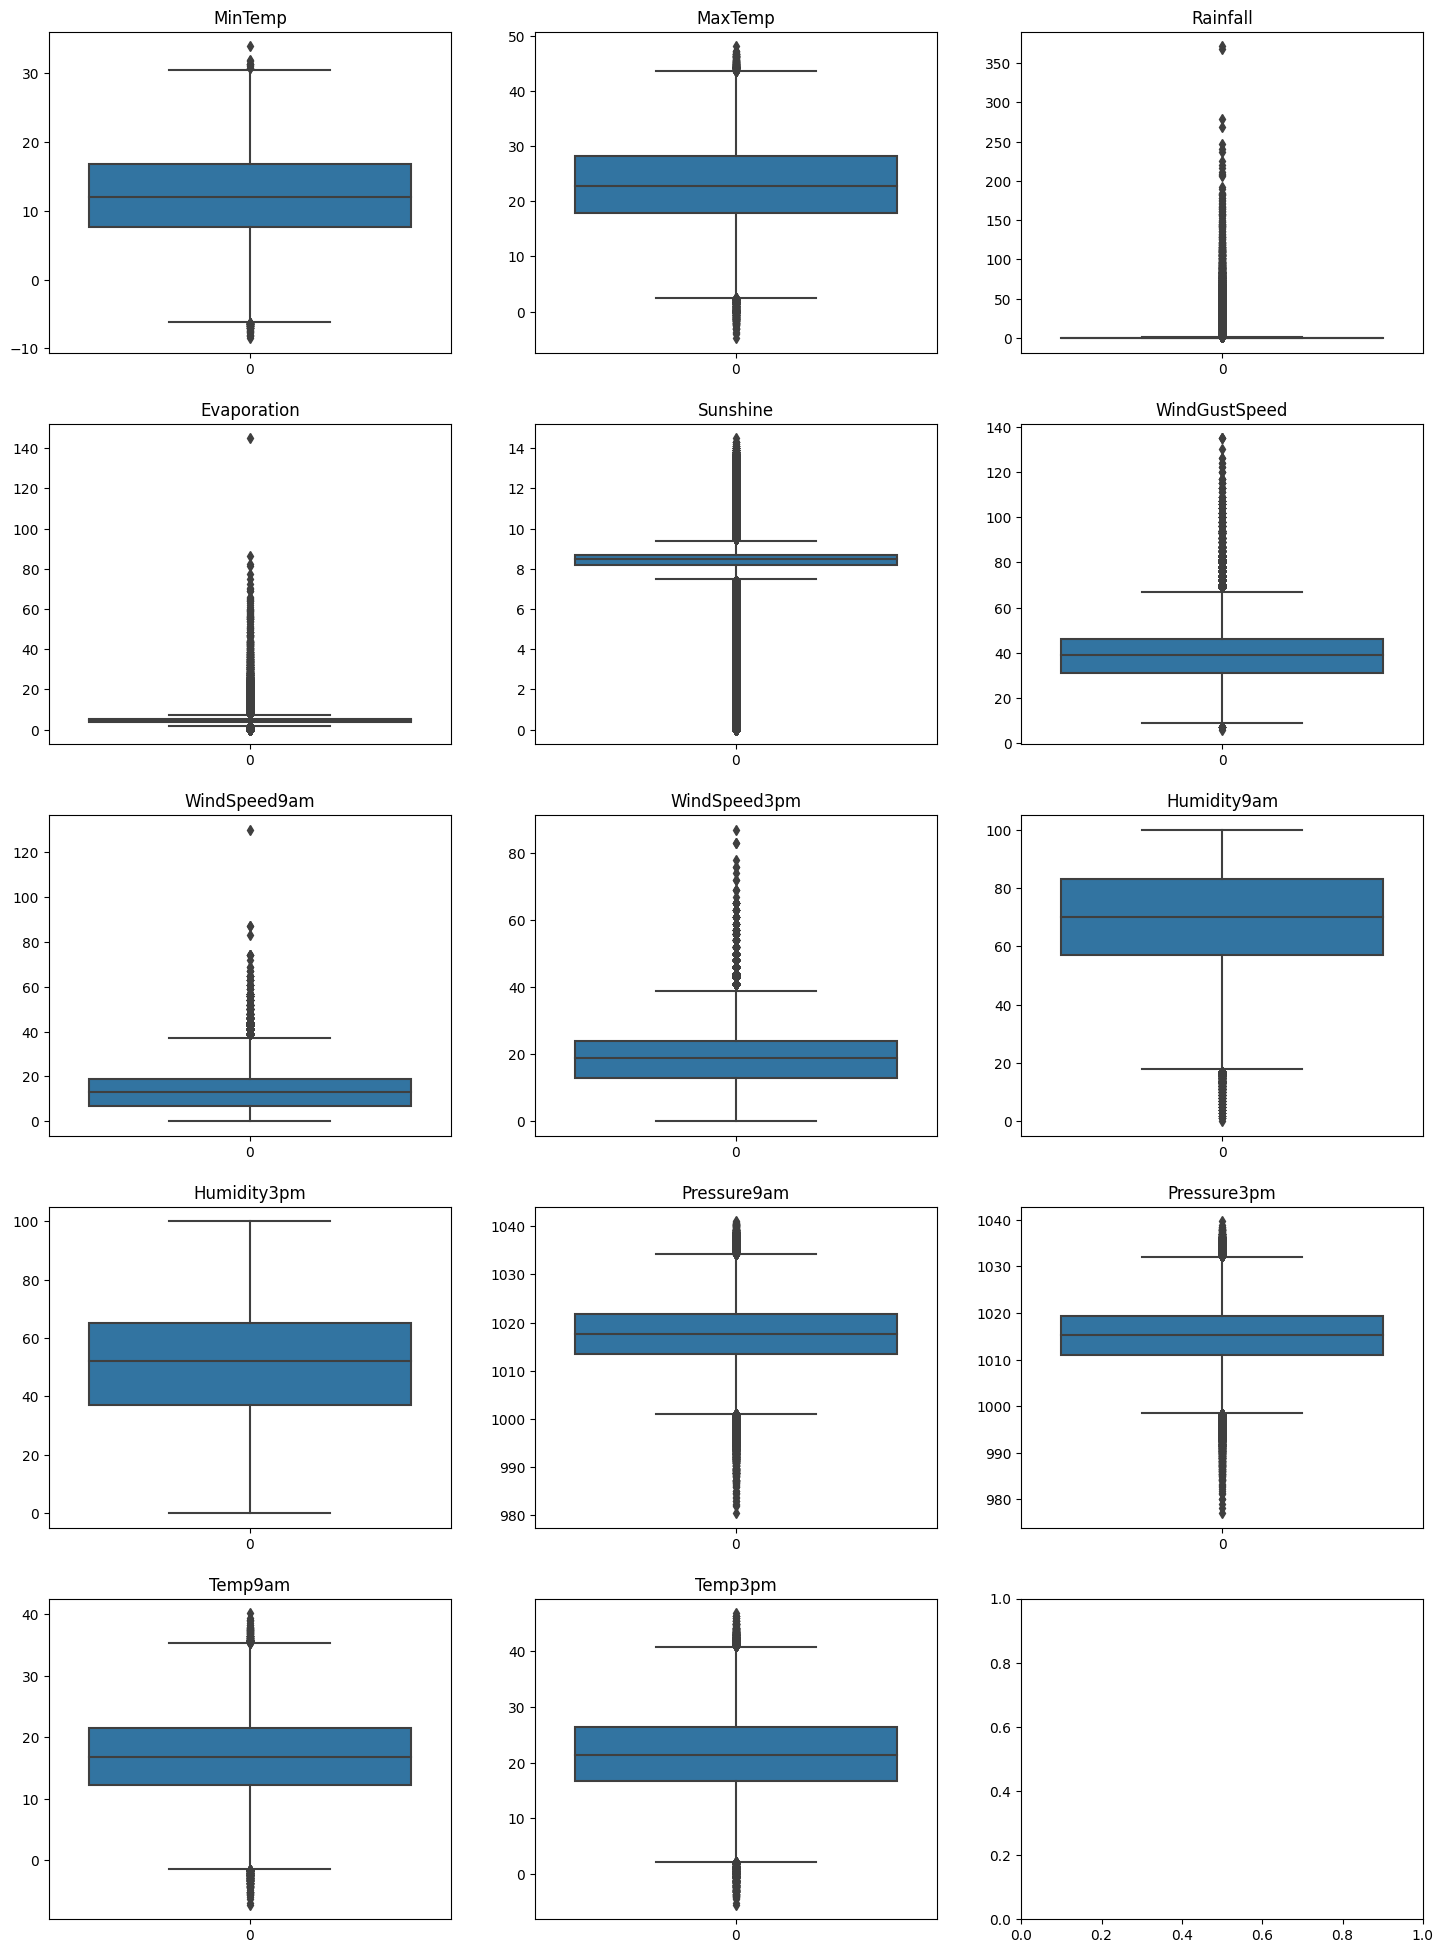

In [43]:
fig,axes=plt.subplots(5,3,figsize=(15,20))
fig.tight_layout(pad=3.0) #padding for better spacing
for i in range(len(continuous_val_attributes)):
    att=continuous_val_attributes[i]
    sns.boxplot(df[att],ax=axes[i//3,i%3])
    axes[i//3,i%3].set_title(att)
plt.show()

In [44]:
for i in continuous_val_attributes:
  q3=df[i].quantile(0.75)
  q1=df[i].quantile(0.25)
  iqr=q3-q1
  ll=q1-1.5*iqr
  ul=q3+1.5*iqr
  df.loc[df[i]>=ul,i]=ul
  df.loc[df[i]<=ll,i]=ll

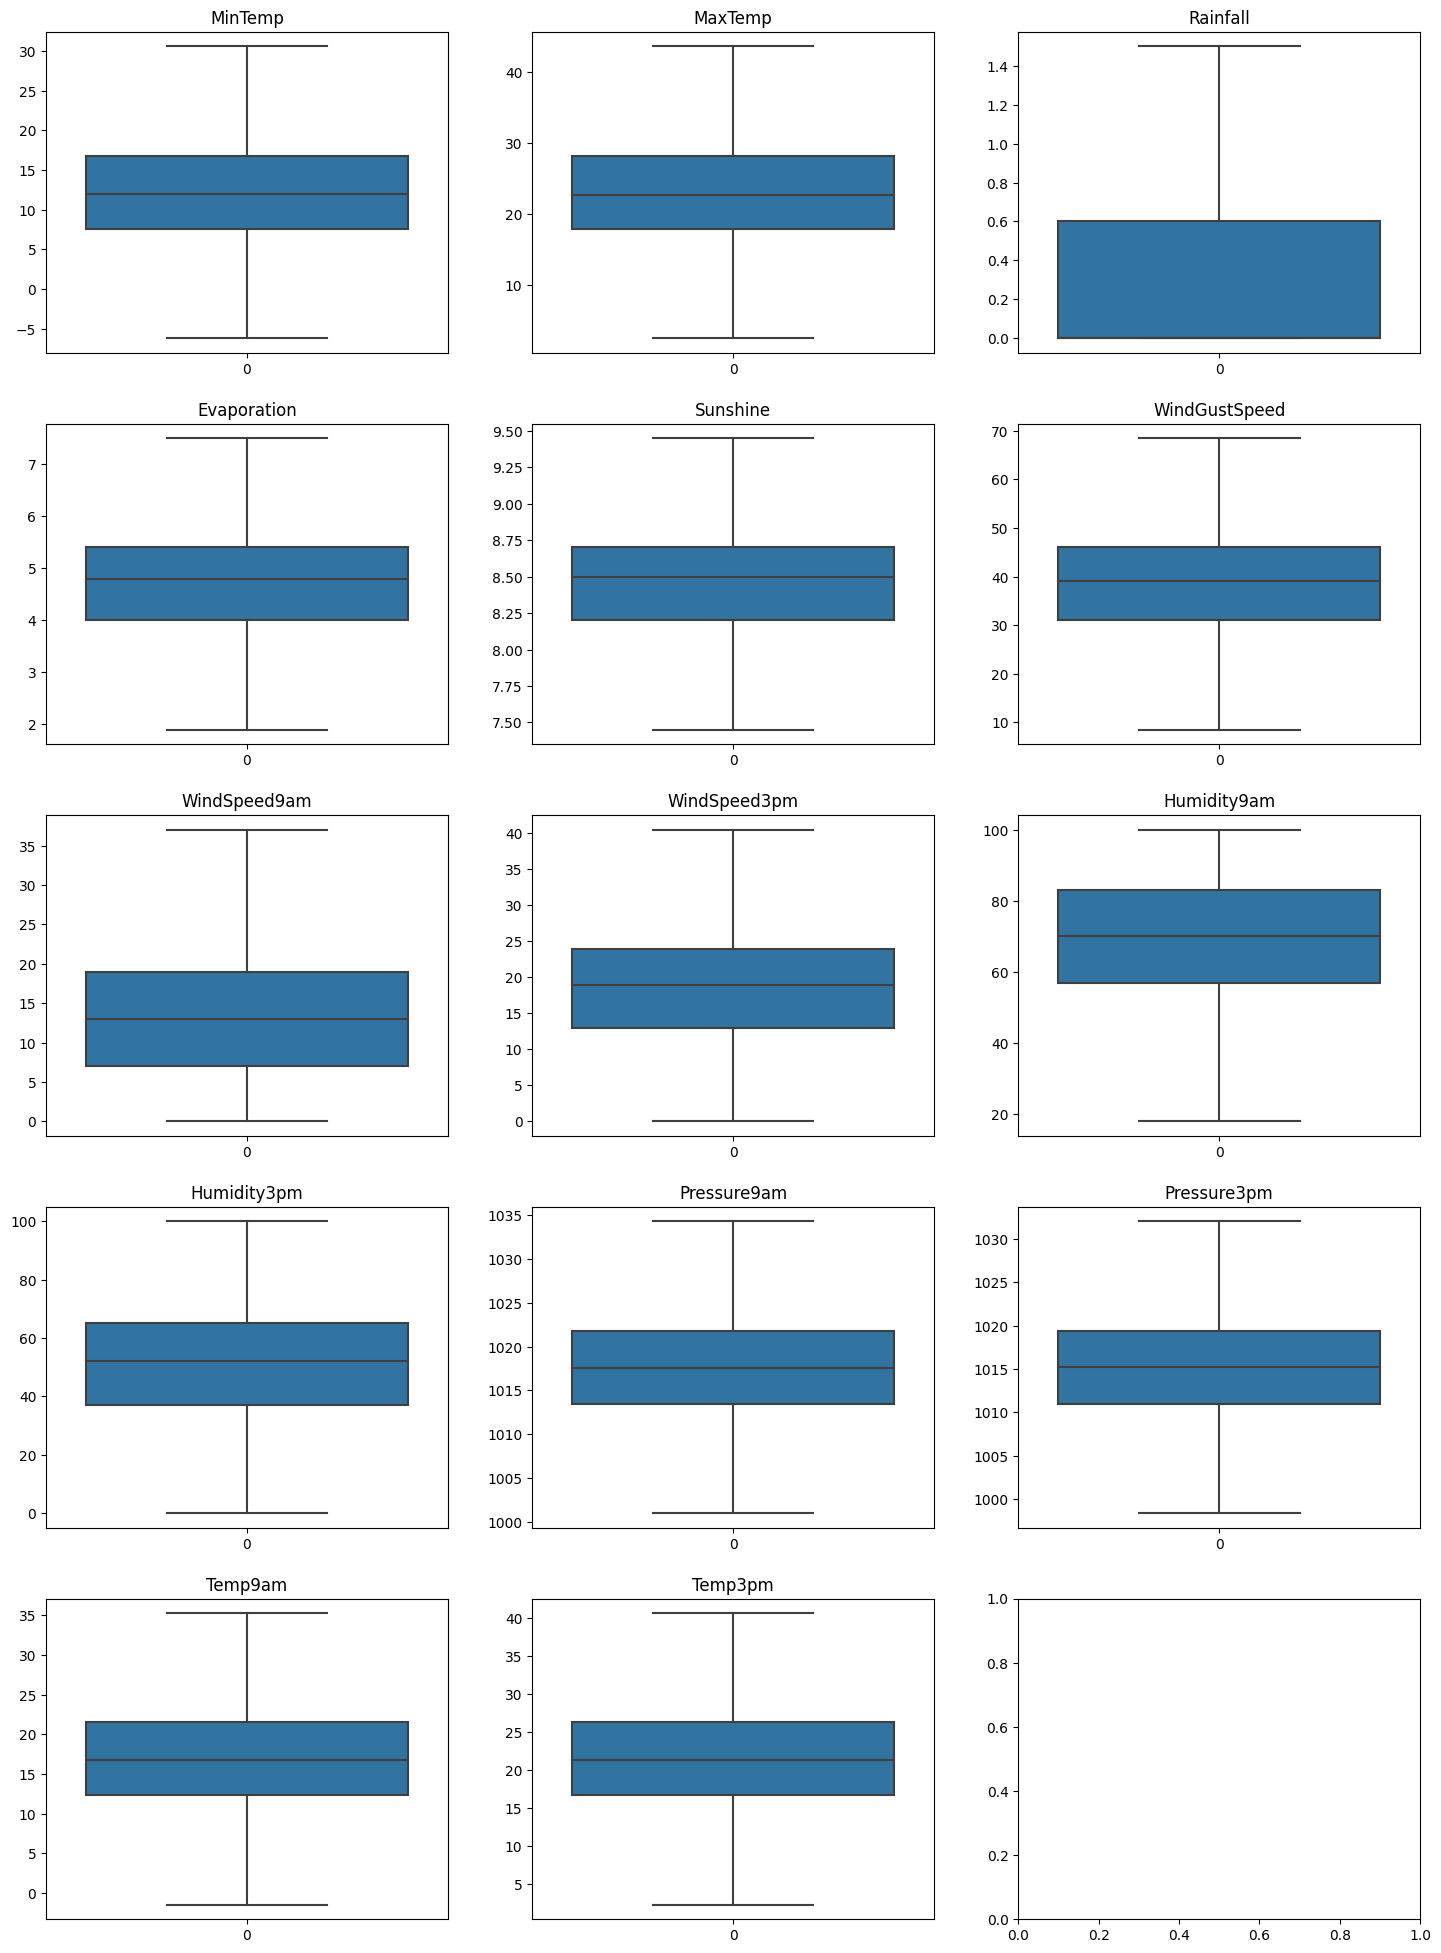

In [45]:
fig,axes=plt.subplots(5,3,figsize=(15,20))
fig.tight_layout(pad=3.0) #padding for better spacing
for i in range(len(continuous_val_attributes)):
    att=continuous_val_attributes[i]
    sns.boxplot(df[att],ax=axes[i//3,i%3])
    axes[i//3,i%3].set_title(att)
plt.show()

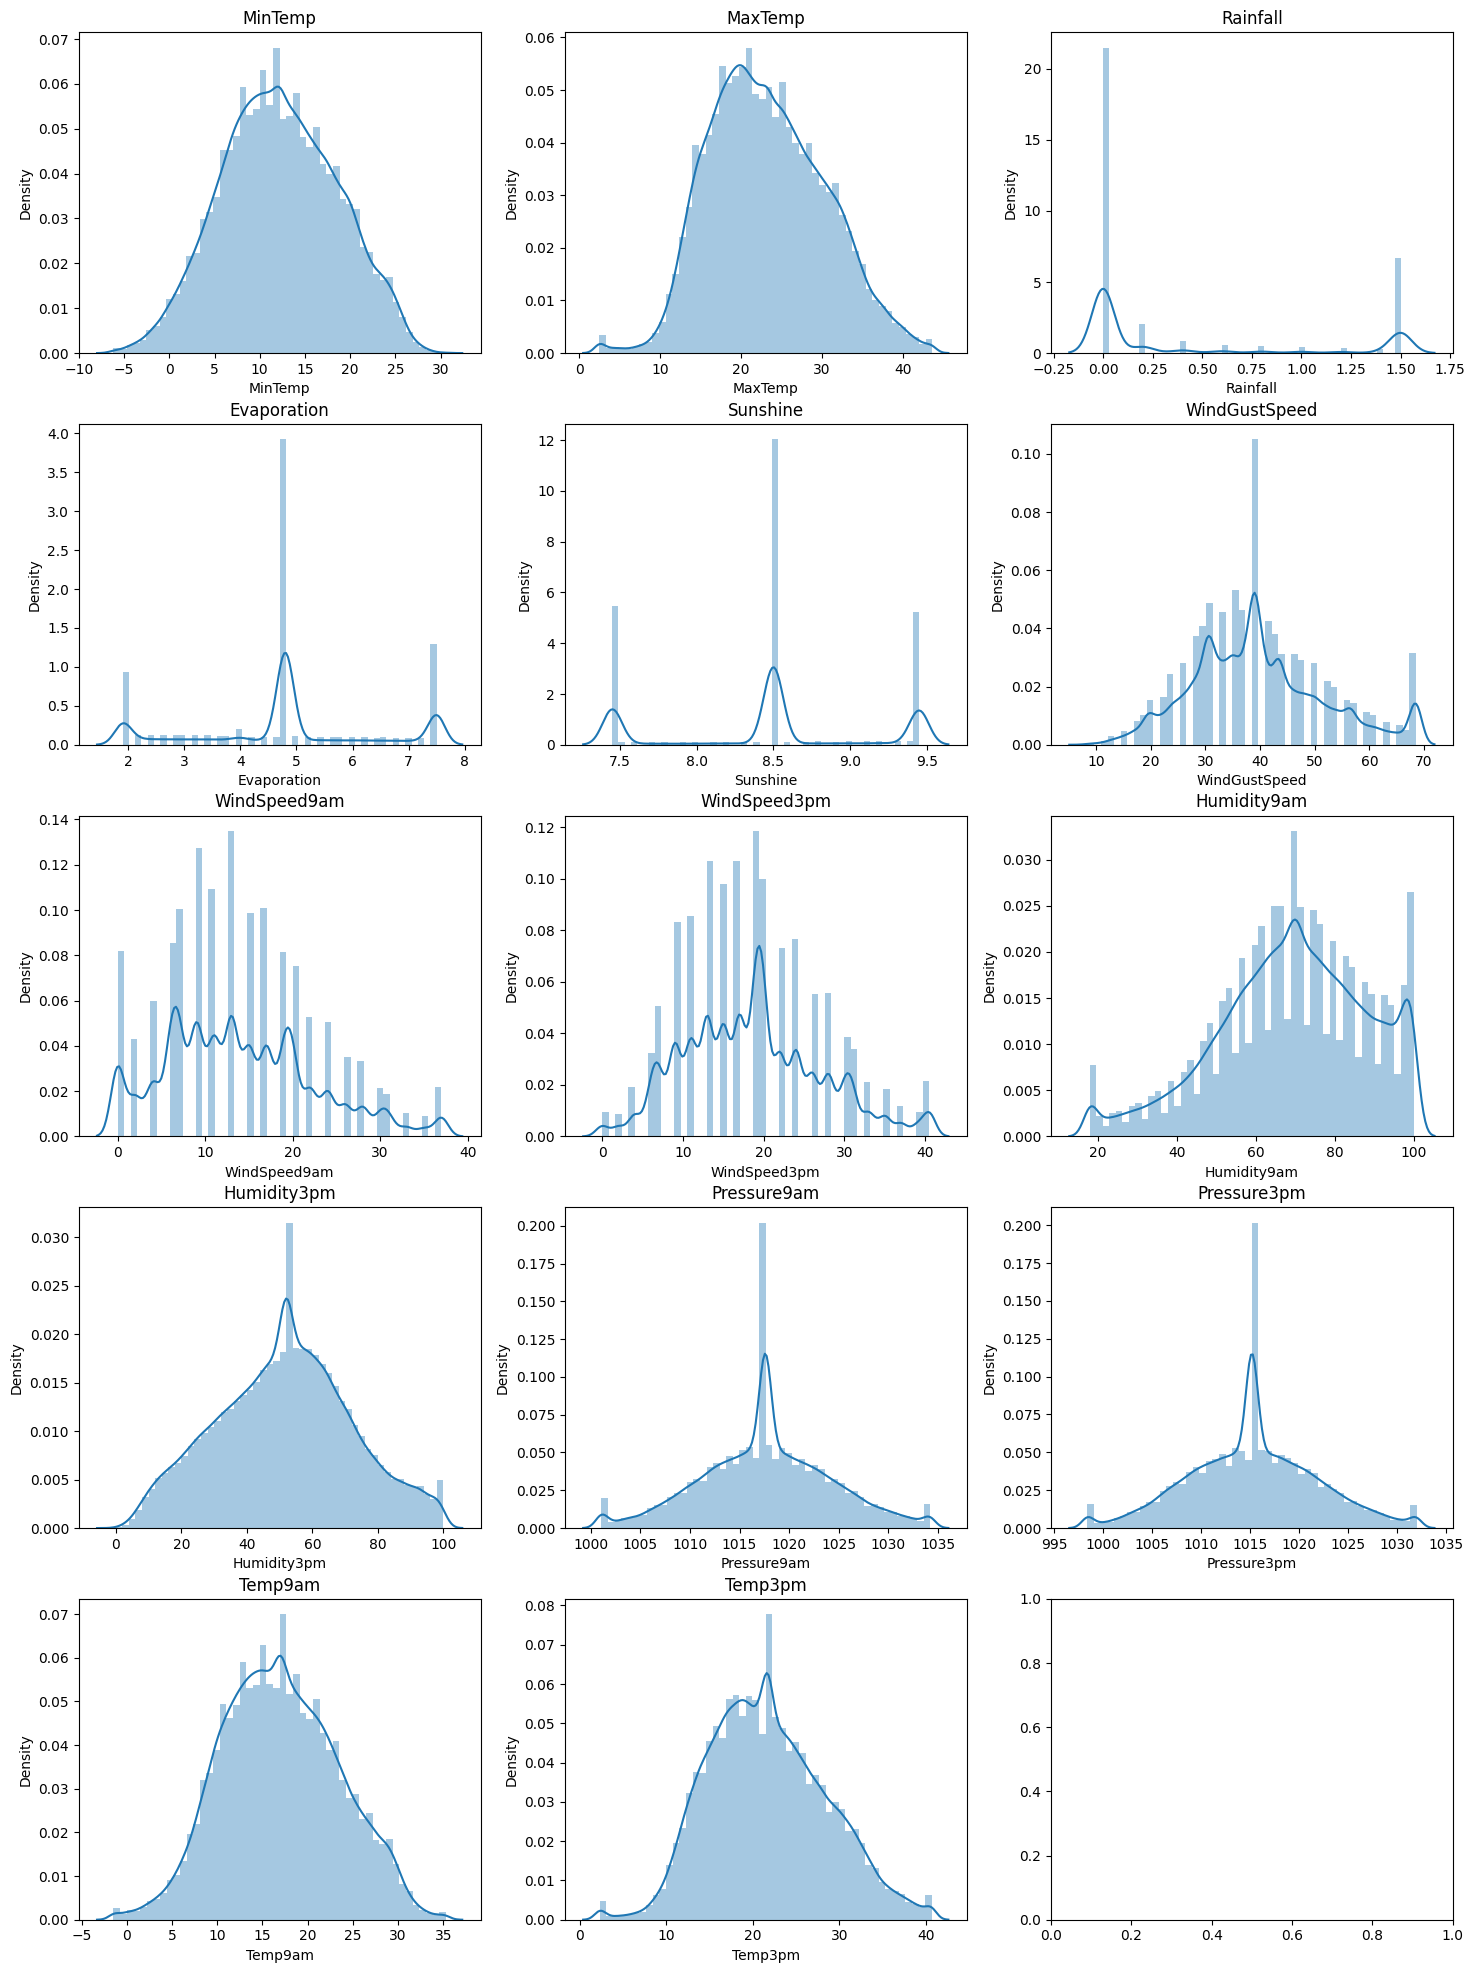

In [46]:
fig,axes=plt.subplots(5,3,figsize=(15,20))
fig.tight_layout(pad=3.0) #padding for better spacing
for i in range(len(continuous_val_attributes)):
    att=continuous_val_attributes[i]
    sns.distplot(df[att],ax=axes[i//3,i%3])
    axes[i//3,i%3].set_title(att)
plt.show()

<Axes: >

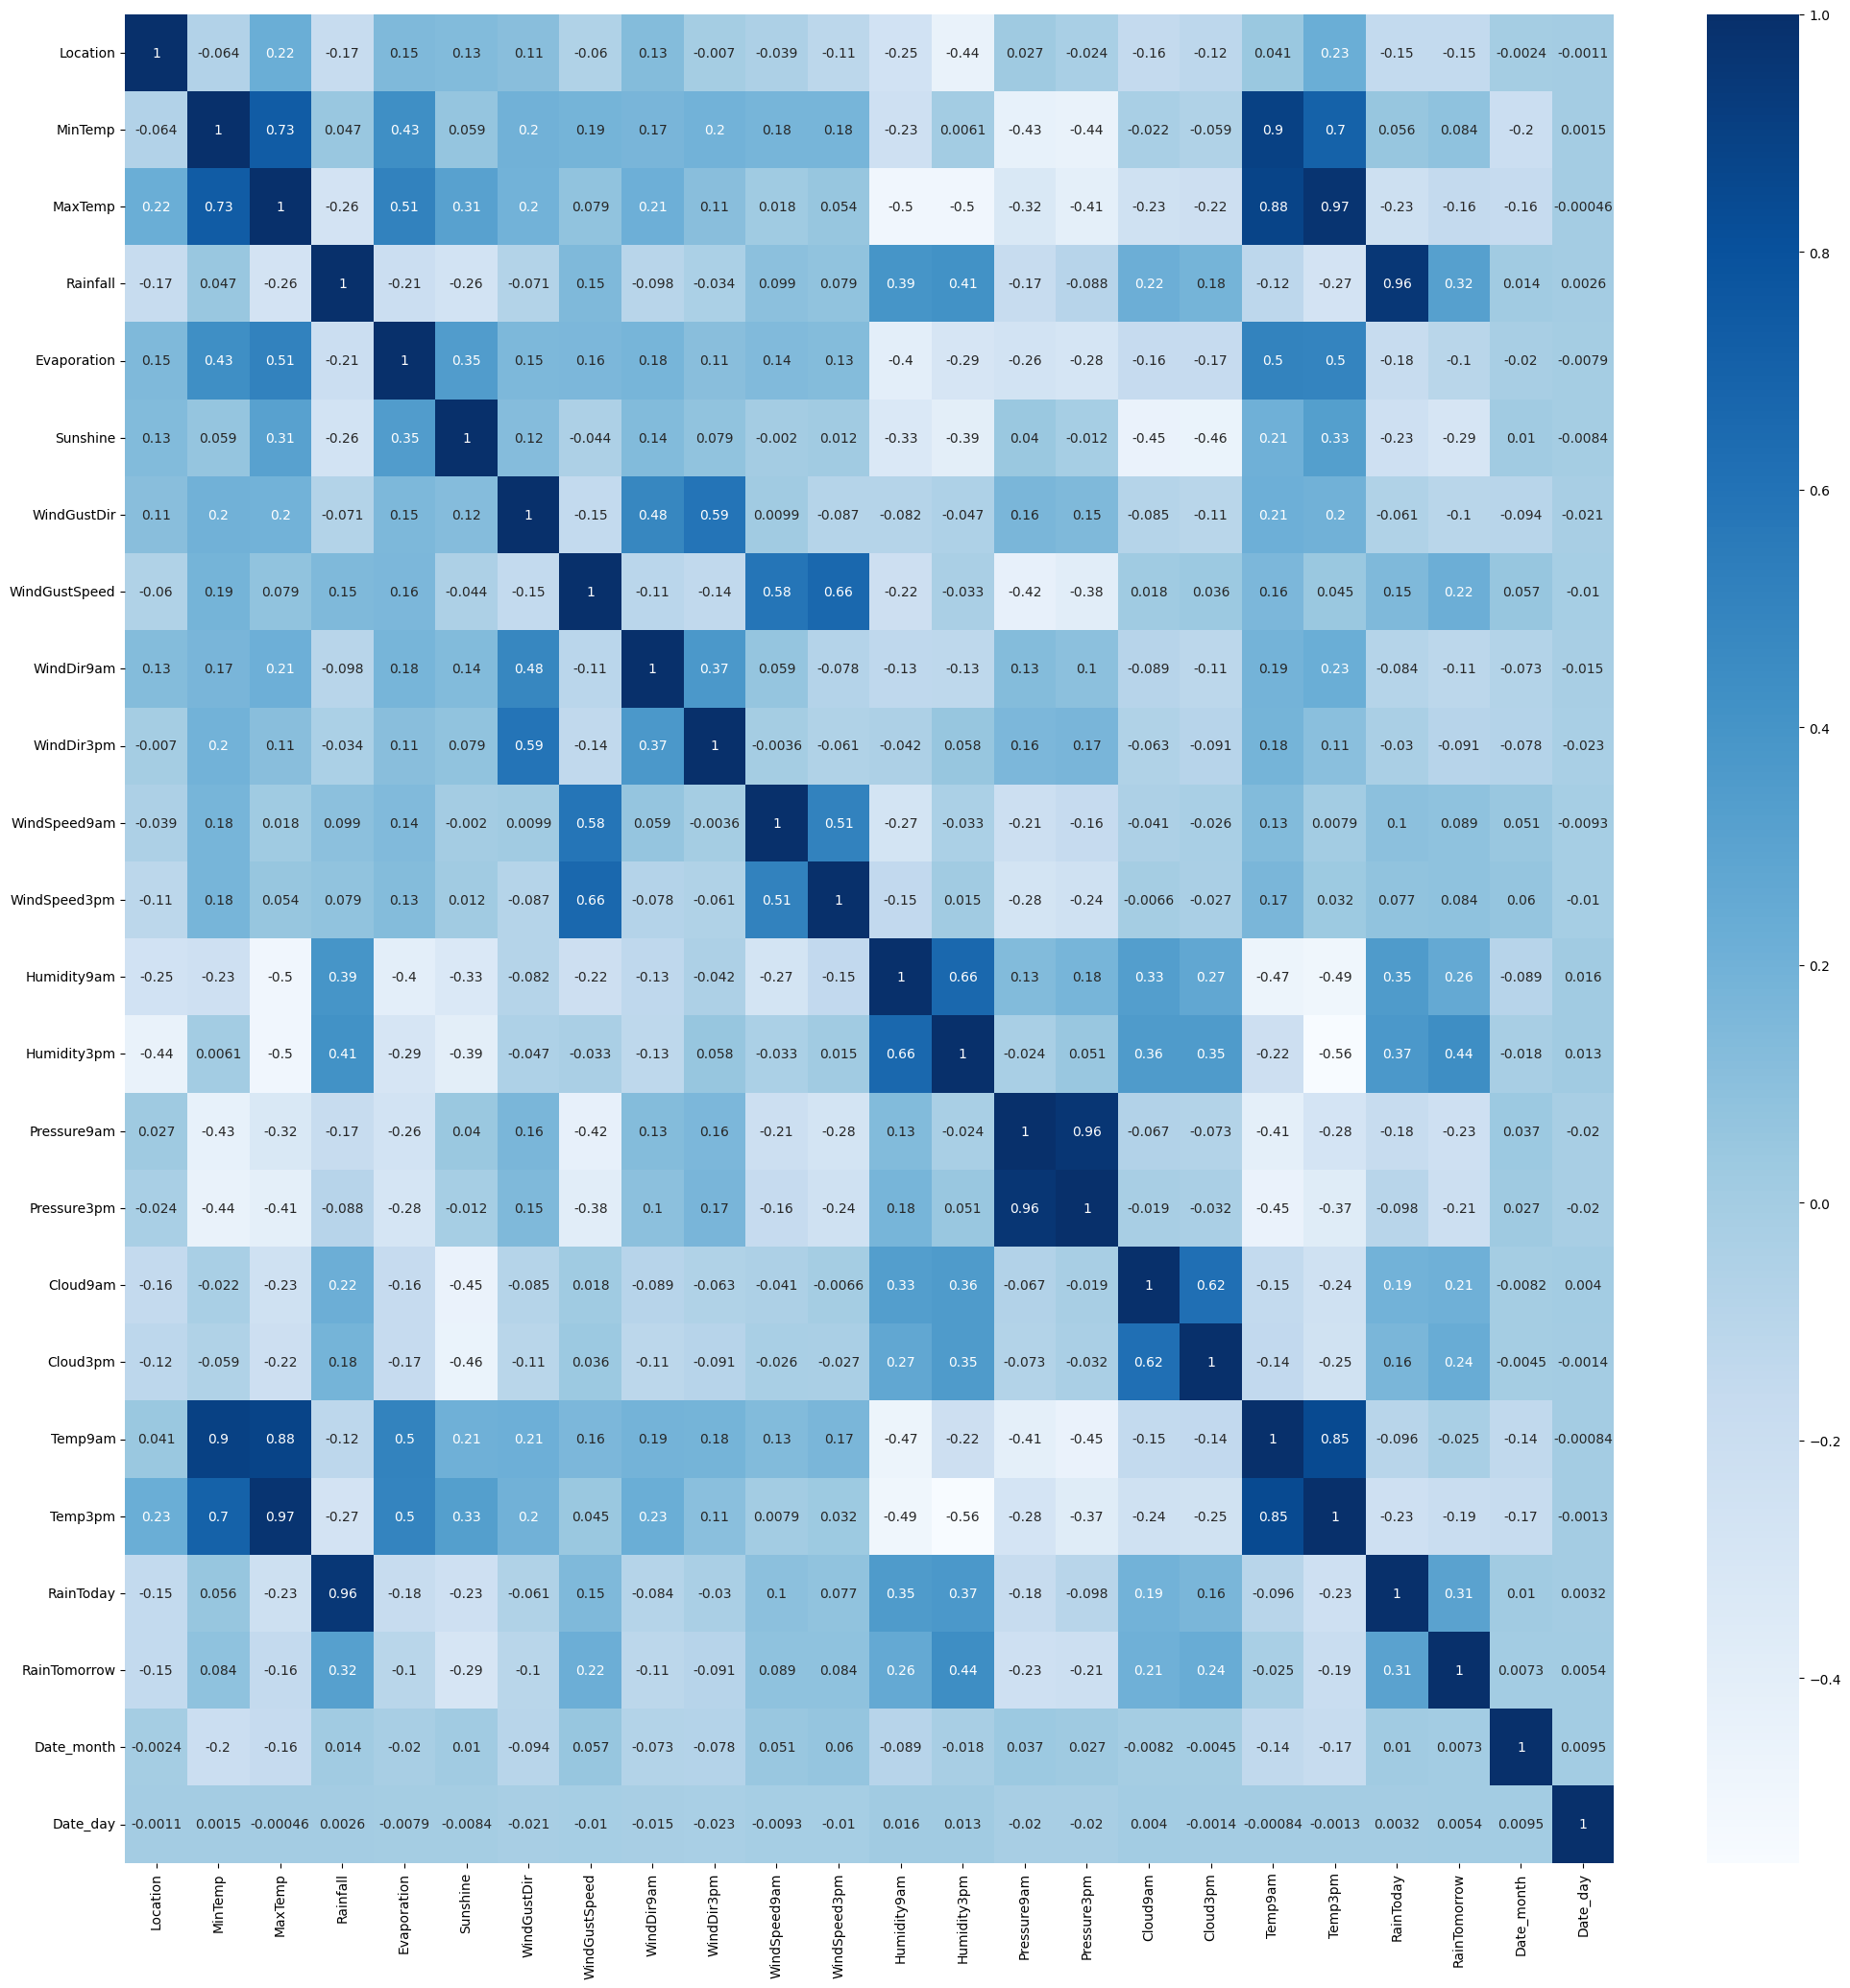

In [47]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [48]:
dfp=df

In [49]:
#feature selection: "Location","MaxTemp","Sunshine","WindGustSpeed","Humidity9am","Pressure9pm","Cloud9am",
#"Cloud3pm",
dfp.dtypes

Date             datetime64[ns]
Location                  int64
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir               int64
WindGustSpeed           float64
WindDir9am                int64
WindDir3pm                int64
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                 int64
RainTomorrow              int64
Date_month                int64
Date_day                  int64
dtype: object

In [50]:
df['RainToday'].value_counts()

0    110738
1     31455
Name: RainToday, dtype: int64

USING XGBOOST

In [51]:
dfp=df
del dfp['Date_day']
del dfp['Date_month']

In [52]:
x=dfp[["Location","MaxTemp","Sunshine","WindGustSpeed","Humidity9am","Pressure3pm","Cloud9am","Cloud3pm"]]
y=dfp['RainToday']
print(x.shape)
print(y.shape)

(142193, 8)
(142193,)


In [53]:
x.head(20)

,Location,MaxTemp,Sunshine,WindGustSpeed,Humidity9am,Pressure3pm,Cloud9am,Cloud3pm
0,29,22.9,8.5,44.0,71.0,1007.1,8.0,7.0
1,29,25.1,8.5,44.0,44.0,1007.8,7.0,7.0
2,29,25.7,8.5,46.0,38.0,1008.7,7.0,2.0
3,29,28.0,8.5,24.0,45.0,1012.8,7.0,7.0
4,29,32.3,8.5,41.0,82.0,1006.0,7.0,8.0
5,29,29.7,8.5,56.0,55.0,1005.4,7.0,7.0
6,29,25.0,8.5,50.0,49.0,1008.2,1.0,7.0
7,29,26.7,8.5,35.0,48.0,1010.1,7.0,7.0
8,29,31.9,8.5,68.5,42.0,1003.6,7.0,7.0
9,29,30.1,8.5,28.0,58.0,1005.7,7.0,7.0


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
from imblearn.over_sampling import RandomOverSampler

In [57]:
#since there is imbalance of data we will use overSampler
ros = RandomOverSampler(sampling_strategy='minority',random_state=22)
X_train,y_train=ros.fit_resample(X_train, y_train)

In [58]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [59]:
models = [LogisticRegression(), XGBClassifier()]
from sklearn.metrics import classification_report
for i in range(2):
  models[i].fit(X_train, y_train)
  print(models[i])
  train_preds = models[i].predict_proba(X_train)
  trainpred=models[i].predict(X_train)
  print('Training Accuracy : ', metrics.roc_auc_score(y_train, train_preds[:,1]))
  testpred=models[i].predict(X_test)
  val_preds = models[i].predict_proba(X_test)
  print('Validation Accuracy : ', metrics.roc_auc_score(y_test, val_preds[:,1]))
  report = classification_report(y_test,testpred)
  print(report)
  print()

LogisticRegression()
Training Accuracy :  0.8037131883719273
Validation Accuracy :  0.8031975911282734
              precision    recall  f1-score   support

           0       0.91      0.71      0.79     22225
           1       0.42      0.75      0.53      6214

    accuracy                           0.71     28439
   macro avg       0.66      0.73      0.66     28439
weighted avg       0.80      0.71      0.74     28439


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min

In [60]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")
predictions = model.predict(X_test)

Epoch 1/50
2213/2213 [==============================] - 9s 4ms/step - loss: 1.7283 - accuracy: 0.5996 - val_loss: 0.9702 - val_accuracy: 0.0000e+00
Epoch 2/50
2213/2213 [==============================] - 9s 4ms/step - loss: 0.6633 - accuracy: 0.6242 - val_loss: 0.9861 - val_accuracy: 0.0000e+00
Epoch 3/50
2213/2213 [==============================] - 9s 4ms/step - loss: 0.6482 - accuracy: 0.6247 - val_loss: 0.8750 - val_accuracy: 0.0000e+00
Epoch 4/50
2213/2213 [==============================] - 9s 4ms/step - loss: 0.5748 - accuracy: 0.6824 - val_loss: 0.6905 - val_accuracy: 0.5260
Epoch 5/50
2213/2213 [==============================] - 19s 9ms/step - loss: 0.5400 - accuracy: 0.7287 - val_loss: 0.5996 - val_accuracy: 0.6176
Epoch 6/50
2213/2213 [==============================] - 14s 6ms/step - loss: 0.5360 - accuracy: 0.7292 - val_loss: 0.6040 - val_accuracy: 0.6413
Epoch 7/50
2213/2213 [==============================] - 10s 4ms/step - loss: 0.5341 - accuracy: 0.7315 - val_loss: 0.6180 

In [61]:
import pickle
pickle.dump(models[1],open('rainfall1.pkl','wb'))

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
binary_predictions = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, binary_predictions)
print(f"Accuracy: {accuracy:.2f}")
roc_auc = roc_auc_score(y_test, predictions)
print(f"ROC-AUC: {roc_auc:.2f}")
classification_report_str = classification_report(y_test, binary_predictions)
print("Classification Report:")
print(classification_report_str)
confusion_matrix_result = confusion_matrix(y_test, binary_predictions)
print("Confusion Matrix:")
print(confusion_matrix_result)

Accuracy: 0.76
ROC-AUC: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84     22225
           1       0.46      0.65      0.54      6214

    accuracy                           0.76     28439
   macro avg       0.68      0.72      0.69     28439
weighted avg       0.80      0.76      0.77     28439

Confusion Matrix:
[[17515  4710]
 [ 2186  4028]]
